Notebook to compare first-level predictions from activations to those from edges

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from joblib import load
from templateflow.api import get as tpl_get
from nilearn import image, plotting,masking
from scipy.spatial.distance import squareform
import seaborn as sns
import ptitprince as pt

In [2]:
final_subjects = np.loadtxt("../data/subjects_intersect_motion_035.txt")
n_subjects = len(final_subjects)

gm_mask_img = "../data/masks/grey_mask_motion_035.nii.gz"
edge_shen_mask_img = "../data/masks/edge_shen_mask.nii.gz"

# TASK-STROOP

In [4]:
node_pattern = "../results/first-level/node/task-stroop/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_node_stroop = [node_pattern % subj for subj in final_subjects]
first_node_stroop = masking.apply_mask(first_node_stroop, mask_img=gm_mask_img)

edge_atlas_pattern =  "../results/first-level/edge/shen/task-stroop/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_edge_atlas_stroop = [edge_atlas_pattern % subj for subj in final_subjects]
first_edge_atlas_stroop = masking.apply_mask(first_edge_atlas_stroop, mask_img = edge_shen_mask_img)

edge_seed_pos_pattern =  "../results/first-level/edge/seed/task-stroop/positive/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_edge_seed_pos_stroop = [edge_seed_pos_pattern % subj for subj in final_subjects]
first_edge_seed_pos_stroop = masking.apply_mask(first_edge_seed_pos_stroop, mask_img = gm_mask_img)

edge_seed_neg_pattern =  "../results/first-level/edge/seed/task-stroop/negative/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_edge_seed_neg_stroop = [edge_seed_neg_pattern % subj for subj in final_subjects]
first_edge_seed_neg_stroop = masking.apply_mask(first_edge_seed_neg_stroop, mask_img=gm_mask_img)

Let's compute the principal components in each set. We will use these to compute a matrix of correlations between them so as to assess their inter-principal component similarities.

In [7]:
def generate_plots(first_level_node, first_level_atlas, first_level_seed_pos, first_level_seed_neg):
    from sklearn.decomposition import PCA
    
    pca =  PCA()

    # Project data to principal components
    
    pca_node = pca.fit_transform(first_level_node)
    pca_edge_atlas = pca.fit_transform(first_level_atlas)
    pca_edge_seed_pos = pca.fit_transform(first_level_seed_pos)
    pca_edge_seed_neg = pca.fit_transform(first_level_seed_neg)
    
    # Compute correlations between all of these components
    corr_mat = np.corrcoef(np.column_stack((pca_node, pca_edge_atlas, pca_edge_seed_pos, pca_edge_seed_neg)).T)
    
    vmax = np.max(corr_mat[np.triu_indices_from(corr_mat, k=1)])
    vmin = np.min(corr_mat[np.triu_indices_from(corr_mat, k=1)])
    print(vmax)
    print(vmin)
    fig, axs = plt.subplots(ncols=2, figsize = (15, 7))
    im = sns.heatmap(corr_mat, annot=False, fmt=".3f", cmap = plt.cm.RdBu_r, 
                    center=0, vmax=0.2, vmin = -0.2, 
                     xticklabels=False, yticklabels = False, square=True, ax = axs[0], 
                     cbar_kws={'shrink':0.9})
    axs[0].figure.axes[-1].yaxis.set_tick_params(labelsize=15)
    axs[0].hlines(y = 0, xmin=259, xmax=259*4, colors = "black", linewidth=5)
    axs[0].hlines(y = 259, xmin=259, xmax=259*4, colors="black", linewidth=5)
    axs[0].vlines(x = 259, ymin=0, ymax=259, colors = "black", linewidth=5)
    axs[0].vlines(x = 2*259, ymin=0, ymax=259, colors = "black", linewidth=5)
    axs[0].vlines(x = 3*259, ymin=0, ymax=259, colors = "black", linewidth=5)
    axs[0].vlines(x = 4*259, ymin=0, ymax=259, colors = "black", linewidth=5)
    axs[0].text(s = "ATLAS", x = 1.2*259, y = 0.55*259, fontsize=15, fontweight="bold")
    axs[0].text(s = "SEED-POS", x = 2.05*259, y = 0.55*259, fontsize=15, fontweight="bold")
    axs[0].text(s = "SEED-NEG", x = 3.05*259, y = 0.55*259, fontsize=15, fontweight="bold")

    raind_clound_data = dict()
    for name, ii in zip(['Atlas', 'Seed-pos', 'Seed-neg'], list(range(1, 4))):
        raind_clound_data[name] = corr_mat[:n_subjects, (ii*n_subjects):((ii+1)*n_subjects)].flatten()

    raind_clound_data = pd.DataFrame(raind_clound_data)
    pt.RainCloud(x = 'case', 
                 y = 'correlation', 
                 data = pd.melt(raind_clound_data, 
                                value_name = "correlation", 
                                var_name = "case"), 
                 orient='h', linewidth=0, ax=axs[1])

    axs[1].set_ylabel("")
    axs[1].set_xlabel("Pearson correlation", size=20)
    plt.tick_params(labelsize=20)
    plt.tight_layout()
    #return fig

0.7353722183359962
-0.8328868670973789


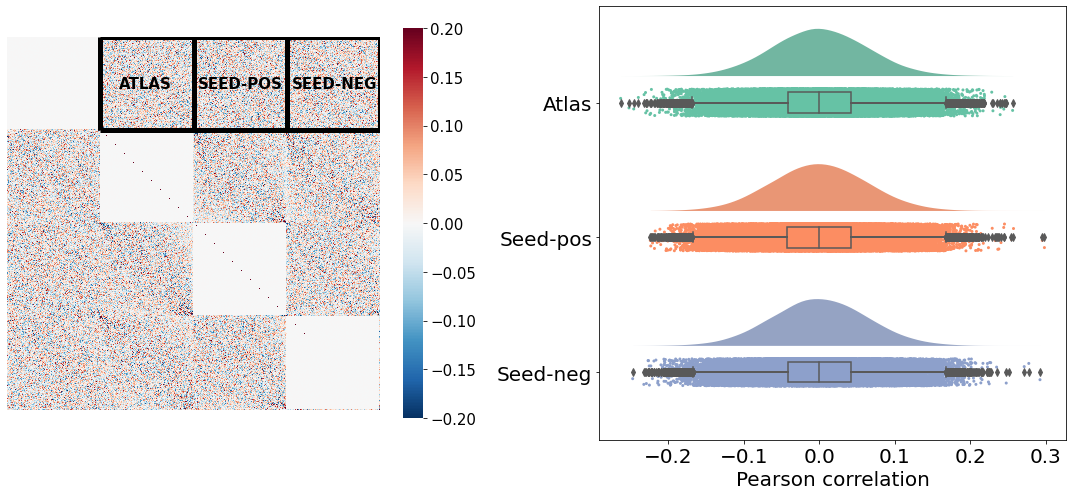

In [8]:
generate_plots(first_level_node = first_node_stroop, 
               first_level_atlas = first_edge_atlas_stroop, 
               first_level_seed_pos = first_edge_seed_pos_stroop, 
               first_level_seed_neg = first_edge_seed_neg_stroop)

# TASK-MSIT

In [123]:
node_pattern = "../results/first-level/node/task-msit/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_node_msit = [node_pattern % subj for subj in final_subjects]
first_node_msit = masking.apply_mask(first_node_msit, mask_img=gm_mask_img)

edge_atlas_pattern =  "../results/first-level/edge/shen/task-msit/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_edge_atlas_msit = [edge_atlas_pattern % subj for subj in final_subjects]
first_edge_atlas_msit = masking.apply_mask(first_edge_atlas_msit, mask_img = edge_shen_mask_img)

edge_seed_pos_pattern =  "../results/first-level/edge/seed/task-msit/positive/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_edge_seed_pos_msit = [edge_seed_pos_pattern % subj for subj in final_subjects]
first_edge_seed_pos_msit = masking.apply_mask(first_edge_seed_pos_msit, mask_img = gm_mask_img)

edge_seed_neg_pattern =  "../results/first-level/edge/seed/task-msit/negative/sub-%d/Incongruent-Congruent/stat.nii.gz"
first_edge_seed_neg_msit = [edge_seed_neg_pattern % subj for subj in final_subjects]
first_edge_seed_neg_msit = masking.apply_mask(first_edge_seed_neg_msit, mask_img=gm_mask_img)

0.7718287923746499
-0.5171324062662614


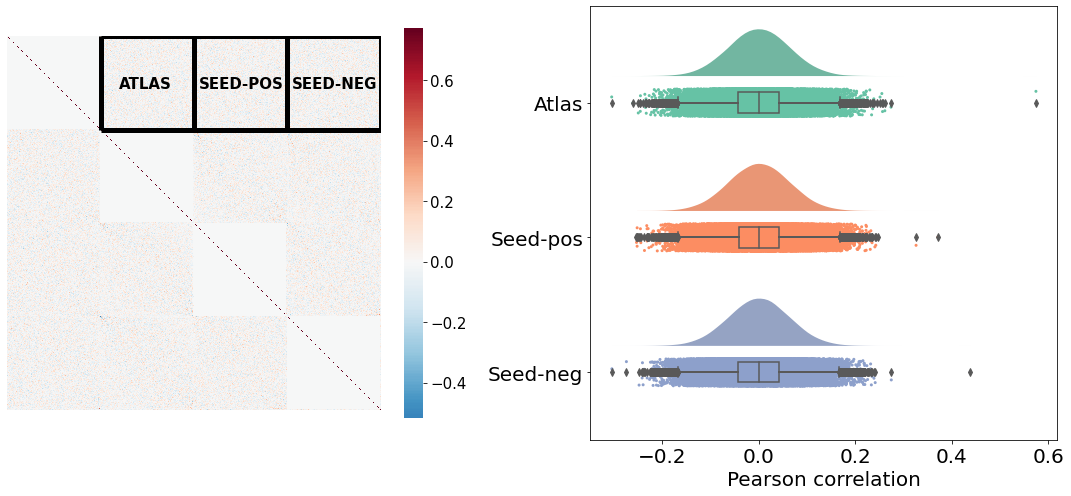

In [124]:
generate_plots(first_level_node = first_node_msit, 
               first_level_atlas = first_edge_atlas_msit, 
               first_level_seed_pos = first_edge_seed_pos_msit, 
               first_level_seed_neg = first_edge_seed_neg_msit)

**From these plots, I infer that connectivity measures do not exhibit much of activation similarity and therefore, they appear to be complementary predictive set of features.**